<h2><center>Final Project - Part 3</center></h2>
<h1><center>Uber Data Analysis in Depth</center></h1>
<h3><center>Author - Abhishek Vakharia&nbsp&nbsp Net ID - avakha2</center></h3>

#### Uber Data Analysis - Part 3 of Final Submission

<b>Basic Functionalities on the Data Set and a basic plot</b>

I have taken up the Uber pick ups in NYC Data Set from Kaggle for the month of April, May, June, July, August and September for the year 2014

Link to the DataSet: https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city/version/2

Data Type: Raw

Data Size:</br> 
uber-raw-data-apr14.csv - 26.11 MB</br>
uber-raw-data-may14.csv - 30.17 MB</br>
uber-raw-data-jun14.csv - 30.70 MB</br>
uber-raw-data-jul14.csv - 36.87 MB</br>
uber-raw-data-aug14.csv - 38.32 MB</br>
uber-raw-data-sep14.csv - 47.54 MB</br>

For this part of the project I have analysed the Uber rides per base based on parameters like the Month and Day of the week.</br>


<b>The Contextual data set</b>: 

I had provided two data sets in Part 2 but I came across a better data set to make the primary data comparable to it.</br>
The chosen data source: https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city/version/2?select=Uber-Jan-Feb-FOIL.csv</br>
The data gives insights into the trips for the months of January 2015 - June 2015 for the same bases as in the primary data set.</br>

#### Introduction </br>
I have always wanted to know how these huge companies dealing with dynamic data; collect it and then draw conclusions. The primary data set belongs to Uber pick ups in NYC for a few given areas and the contextual data set is also on the similar lines but the two data sets belong to different timeslines, hence one can compare both of the visualzations and conclude on which areas and timeframes are favorable for Uber and thus draw conclusions for Uber to take steps if necessary.


#### Choice of Data Sets </br>
As mentioned before the primary data set is for pick ups in NYC for the months of April'2014 -  September 2014 and the contextual data set is for pick ups in NYC for the months of January'2015 - June'2015, hence making comparision easier and drawing patterns easier.

#### Importing libraries

In [1]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import ipywidgets

#### Reading the Data 

In [2]:
# I have attached the data sets along please download them in the same location as the notbook and run them together
df1=pd.read_csv("uber-raw-data-apr14.csv")
df2=pd.read_csv("uber-raw-data-may14.csv")
df3=pd.read_csv("uber-raw-data-jun14.csv")
df4=pd.read_csv("uber-raw-data-jul14.csv")
df5=pd.read_csv("uber-raw-data-aug14.csv")
df6=pd.read_csv("uber-raw-data-sep14.csv")

#### Aggregating the Primary Data 

In [3]:
#Aggregating the 6 different files using the concat function 
final_df=pd.concat([df1,df2,df3,df4,df5,df6])

In [4]:
#Checking the Final DF
final_df

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [5]:
# Initally summary of the Data Set 
final_df.describe()

,Lat,Lon
count,4.534327e+06,4.534327e+06
mean,4.073926e+01,-7.397302e+01
std,3.994991e-02,5.726670e-02
min,3.965690e+01,-7.492900e+01
25%,4.072110e+01,-7.399650e+01
50%,4.074220e+01,-7.398340e+01
75%,4.076100e+01,-7.396530e+01
max,4.211660e+01,-7.206660e+01


#### Transforming the Data and fetching what is necessary 

In [6]:
final_df['Date/Time'] = pd.to_datetime(final_df['Date/Time'])

In [7]:
# Fetching the Month from the data set
final_df['Month'] = final_df['Date/Time'].dt.month

In [8]:
final_df['Month']

0          4
1          4
2          4
3          4
4          4
          ..
1028131    9
1028132    9
1028133    9
1028134    9
1028135    9
Name: Month, Length: 4534327, dtype: int64

In [9]:
#Sorting the data according to the month 
final_df=final_df.sort_values(by='Month', ascending=False)

#Converting the month values to month names 
final_df['Month'] = final_df['Month'].apply(lambda x: calendar.month_abbr[x])

In [10]:
final_df['Month']

1028135    Sep
342707     Sep
342720     Sep
342719     Sep
342718     Sep
          ... 
376351     Apr
376352     Apr
376353     Apr
376354     Apr
0          Apr
Name: Month, Length: 4534327, dtype: object

In [11]:
#Fetching the day from the data set 
final_df['Day'] = final_df['Date/Time'].dt.day

In [12]:
#Fetching the day of the weel from the data set 
final_df['DOW'] = final_df['Date/Time'].dt.dayofweek

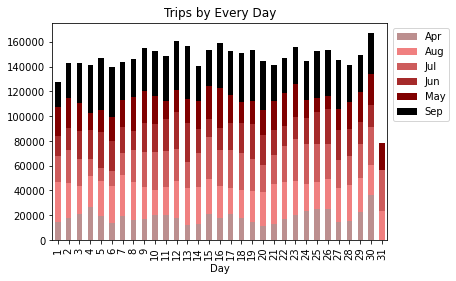

In [13]:
#Trips Every Day for Each Month
final_df.groupby(['Month','Day'])['Day'].count().unstack('Month').plot.bar(stacked=True,color=("rosybrown","lightcoral","indianred","brown","maroon","black"),title="Trips by Every Day").legend(bbox_to_anchor=(1.2, 1))

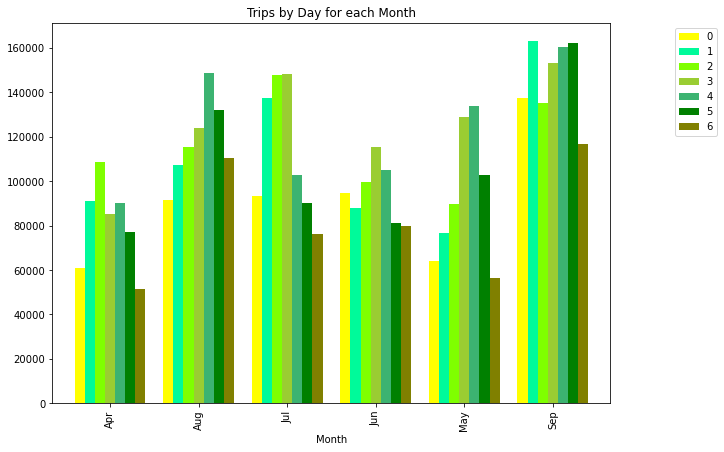

In [14]:
# Trips by Day for each Month
final_df.groupby(['Month','DOW'])['Month'].count().unstack('DOW').plot.bar(stacked=False,color=("yellow","mediumspringgreen","chartreuse","yellowgreen","mediumseagreen","green","olive"),title="Trips by Day for each Month",figsize=(10,7),width=0.8,legend=False).legend(bbox_to_anchor=(1.2, 1))


In [15]:
# Fetching the hour, minute and second 
final_df['Hour'] = pd.DatetimeIndex(final_df['Date/Time']).hour
final_df['Minute'] = pd.DatetimeIndex(final_df['Date/Time']).minute
final_df['Second'] = pd.DatetimeIndex(final_df['Date/Time']).second

In [16]:
# Checkig the final Data set
final_df

,Date/Time,Lat,Lon,Base,Month,Day,DOW,Hour,Minute,Second
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,Sep,30,1,22,58,0
342707,2014-09-06 10:48:00,40.6733,-73.9763,B02617,Sep,6,5,10,48,0
342720,2014-09-06 10:50:00,40.7218,-73.9947,B02617,Sep,6,5,10,50,0
342719,2014-09-06 10:50:00,40.7933,-73.9152,B02617,Sep,6,5,10,50,0
342718,2014-09-06 10:50:00,40.7152,-74.0131,B02617,Sep,6,5,10,50,0
...,...,...,...,...,...,...,...,...,...,...
376351,2014-04-07 05:25:00,40.7283,-74.0031,B02682,Apr,7,0,5,25,0
376352,2014-04-07 05:25:00,40.6141,-73.9187,B02682,Apr,7,0,5,25,0
376353,2014-04-07 05:26:00,40.7341,-73.9812,B02682,Apr,7,0,5,26,0
376354,2014-04-07 05:26:00,40.7349,-73.9813,B02682,Apr,7,0,5,26,0


In [17]:
# Few more imports
import matplotlib.pyplot as plt # importing matplotlib for manipulating figures
import ipywidgets # for interactivity
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype, is_datetime64_any_dtype #to check the data type of columns

## Creating the First plot for Interactivity 

In [18]:
import bqplot
from bqplot import pyplot as plt

fig = plt.figure(title="Rides Per Base Per Month",
                 #fig_margin={'top':50, 'bottom':20, 'left':150, 'right':150},
                 legend_location="top-left")

month = final_df.groupby(['Month','Base'])['Date/Time'].count().unstack('Month')

bar_chart  = plt.bar(x = month.index.tolist(), y= month.T.to_numpy(),
                     labels = month.columns.tolist(),
                     display_legend=True,
                    interactions = {'click': 'select'},
                 anchor_style = {'fill': 'white'},
                 selected_style={'stroke': 'white', 'stroke-width': 3},
                 unselected_style={'opacity':0.6})

bar_chart.type = "grouped"

bar_chart.colors = ["violet","fuchsia","darkviolet","rebeccapurple","deeppink","crimson","red" ]

In [19]:
# Defining the two plots in the first interactivity 
from bqplot import pyplot as plt
from bqplot import LinearScale

# Getting the max range for the rides to set the y limit 
y_max = month.max().max()
y_linear = LinearScale(max=float(y_max))

fig3 = plt.figure(title="Total Rides Per Base",
                 #fig_margin={'top':50, 'bottom':20, 'left':150, 'right':150},
                 legend_location="top-left")

base = final_df.groupby(['Base']).size()


base_chart  = plt.bar(x = base.index.tolist(), y= base.to_numpy(),
                    interactions = {'click': 'select'},
                 anchor_style = {'fill': 'white'},
                 selected_style={'stroke': 'white', 'stroke-width': 3},
                 unselected_style={'opacity':0.6})
# bar_chart.ylim(0, y_max+1000)

base_chart.colors = ["red"]

#Sizing the figure in the first part of the dahboard
fig3.layout.width='50%'


#Creating the second plot for the first part of the dashboard
m1 = final_df.groupby(['Month']).size()

fig4 = plt.figure(title="Rides Month wise for the Base")


m1_plot  = plt.bar(x = m1.index.tolist(), y= m1.to_numpy())


m1_plot.colors = ["bisque","tan","lavender","lightpink","aqua","beige"]

fig4.layout.width='50%'

### The Interactivity 

### About the Interactivity...

I have created two bar plots for the dashboard:</br>
The first one represents the total rides per base, so a base is an area allocated to a certain latitudinal and longitudinal range, so the first bar plot is just a total of the rides for each base.

The second plot is for the monthly rides for each of these bases starting April through September 2014.

### How does it work?

Each bar in the first plot represents the total rides for that particular Base. The second bar plot is the month wise division of rides for that base. So when a user selects a bar on the first plot ( basically a particlar Base is selected ) then a relative bar plot showing the month wise rides for that Base is generated as a result. For example if a user selects the bar for Base B02512 then the relative bar plot on the right will have the month wise division of rides for B02512 i.e rides in April, May, June, July, August and September. </br>


In [20]:
#Code for interactivity between the bar plots 

out = ipywidgets.Output()

def on_selected_base(self, change, final_df):
#     print(change, self)
    base = None
    month = None
    if len(self.selected) == 0:
            label.value = 'No data selected!!'
            return
    base = self.x[change['data']['index']]

    
    subset = final_df.loc[(final_df['Base'] == base)]
    
    dow = subset.groupby(['Month']).size()
    
    m1_plot.x = dow.index.tolist()
    m1_plot.y = dow.values.tolist()
    
base_chart.on_element_click(lambda _, x: on_selected_base(_, x, final_df))

db = ipywidgets.HBox([fig3, fig4])
db

# Contextual Data 

For the contextual data I have taken data similar to the primary data set, but for a different time frame. My primary aim is to compare the results out of the two data sets and draw patterns for the overlapping months while also draw a few observation for the months that differ in both the data sets.

Below are the two visulaizations that give information about the rides bases on a few time parameters which could help uber understand when do they need to improve their sales and number of rides.


In [21]:
# Reading the data 
daf2=pd.read_csv("uber-raw-data-janjune-15.csv")

In [22]:
# Converting to datetime to ease the process of extraction
daf2['Pickup_date'] = pd.to_datetime(daf2['Pickup_date'])

In [23]:
#Extracting the month 
daf2['month'] = daf2['Pickup_date'].dt.month

In [24]:
# Checking the months
daf2['month'].unique()

array([5, 1, 3, 2, 6, 4], dtype=int64)

In [25]:
# extracting the day
daf2['day'] = daf2['Pickup_date'].dt.day

In [26]:
daf2

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,day
0,B02617,2015-05-17 09:47:00,B02617,141,5,17
1,B02617,2015-05-17 09:47:00,B02617,65,5,17
2,B02617,2015-05-17 09:47:00,B02617,100,5,17
3,B02617,2015-05-17 09:47:00,B02774,80,5,17
4,B02617,2015-05-17 09:47:00,B02617,90,5,17
...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,5,8
14270475,B02765,2015-05-08 15:43:00,B02765,263,5,8
14270476,B02765,2015-05-08 15:43:00,B02765,90,5,8
14270477,B02765,2015-05-08 15:44:00,B01899,45,5,8


In [27]:
# Extracting the day of the week 
daf2['dow'] = daf2['Pickup_date'].dt.dayofweek

In [28]:
#Sorting the data according to the month 
daf2=daf2.sort_values(by='month', ascending=False)

#Converting the month values to month names 
daf2['month'] = daf2['month'].apply(lambda x: calendar.month_abbr[x])

### Contextual Visulization 1

I have created a two visulaizations with the primary data, the visulaization I have created here is a direct comparision to the first one where the trips for every different day in the month are calculated for the given months. We have a few visual observatons like the trips for the 29th, 30th and 31st day don't exist for February since its short month. </br>
Comparing the two we can see that the maximum for earlier was around 160,000 where as for this data set it is 500,000.</br>
We can draw many such conclusions and take actions accordingly.


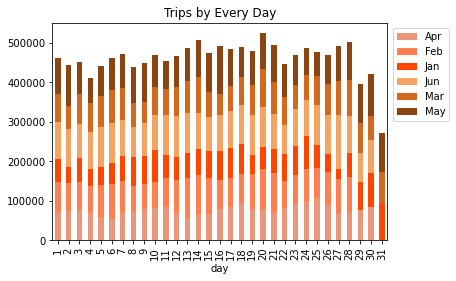

In [29]:
# Trips EVery Day for each Month 
daf2.groupby(['month','day'])['day'].count().unstack('month').plot.bar(stacked=True,color=("darksalmon","coral","orangered","sandybrown","chocolate","saddlebrown"),title="Trips by Every Day").legend(bbox_to_anchor=(1.2, 1))

## Contextual Visualization 2 

The second viz in with the primary data set is about the trips by day of week for each of the months and the viz below is the exact same one helping for direct comparision.
A few visual comparisions would be that the trips in April, May and June have almost tripled or more in number with Tuesday being the leading trips day for April which wasn't the case earlier where Monday was the leading day nd we can draw many such conclusions.

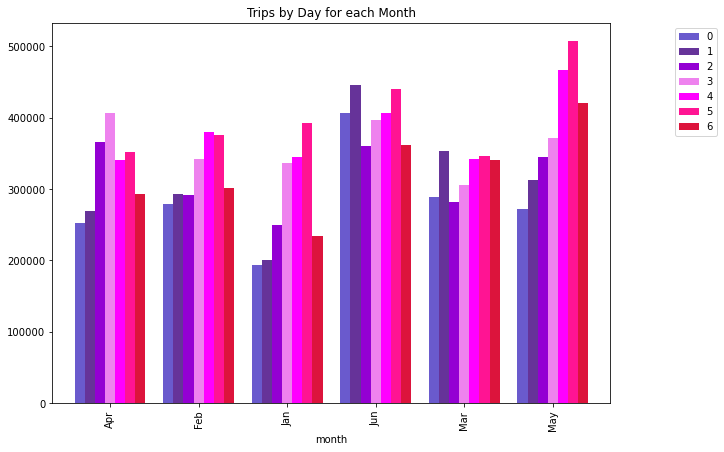

In [30]:
# Trips by Day of the Week for each month
daf2.groupby(['month','dow'])['month'].count().unstack('dow').plot.bar(stacked=False,color=("slateblue","rebeccapurple","darkviolet","violet","fuchsia","deeppink","crimson"),title="Trips by Day for each Month",figsize=(10,7),width=0.8,legend=False).legend(bbox_to_anchor=(1.2, 1))
